# MICROCREDENTIAL PROGRAM MACHINE LEARNING ASSESSMENT

The Titanic embarked from England in April 1912 and was destined for New York City. However it did not make it. In this assessment you will implement a machine learning analysis on data about the passengers on board to predict their survival.

The data is from Kaggle:
https://www.kaggle.com/c/titanic

Survival is a **binary outcome**, meaning there are two possible discrete outcomes (exactly zero or exactly 1, unlike for example a house price which can be any positive value). There are many different approaches to take to predict binary outcomes.

Most of the analysis is filled out but throughout the notebook there are questions for you to answer and some code for you to fill in. To answer the written questions just click on the markdown cells and type your answers there.

Towards the end you will decide which machine learning algorithm to implement in order to predict survival of the Titanic passengers.

This reflects the house regression code from the ML3 session so looking through that notebook can be helpful to assist you on this assessment:\
https://github.com/akshayghosh-acenet/IntroMachineLearning3

And of course if you have any questions whether they are conceptual or about coding feel free to send me a message (:

In [1]:
# IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# you can import more libraries here or thoughout the code

In [2]:
# LOAD DATA

fn_train = 'train_titanic.csv'
fn_test = 'test_titanic.csv'

train_data = pd.read_csv(fn_train) # this has known outcomes, used for training and tuning
test_data = pd.read_csv(fn_test) # this does not have known outcomes

## EDA

With the data loaded, we now want to do the very important first step of any ML analysis: exploratory data analysis or EDA.

There are many different things that can be done in EDA, here we will look at the basic statistics (i.e. mean, median, etc) along with histograms of the numerical data.

In [3]:
# a good first step is to do dataframe.head() to see generally what the data looks like

train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# here we use dataframe.describe() to get statistics on each of the columns

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Variables explained:

**Below are explanations of the variables/parameters in the dataset. Think about which ones you think should be included in the analysis, you will need to decide this later.**

| Variable | Definition | Key |
|---|---|---|
| Survived | Did they survive | 0 = no, 1 = yes |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Sex | sex | - |
| Age | Age in years | - |
| SibSp| # of siblings/spouses on board | - |
| Parch | # of parents/children on board | - |
| Ticket | Ticket number | - |
| Fare | Passenger fare | - |
| Cabin | Cabin Nuber | - |
| Embarked | Port left from | C = Cherbourg, Q = Queenstown, S = Southampton |

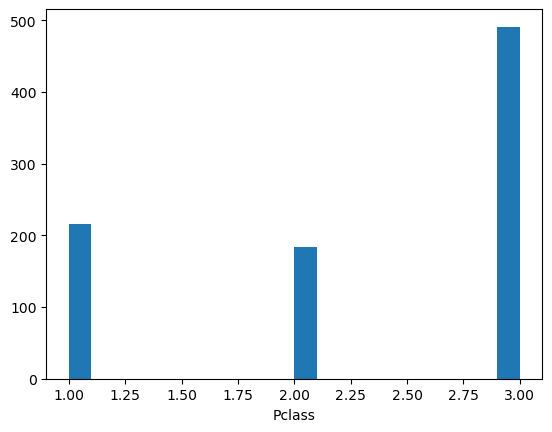

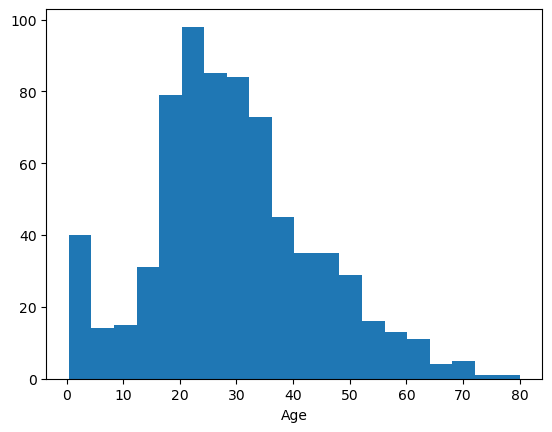

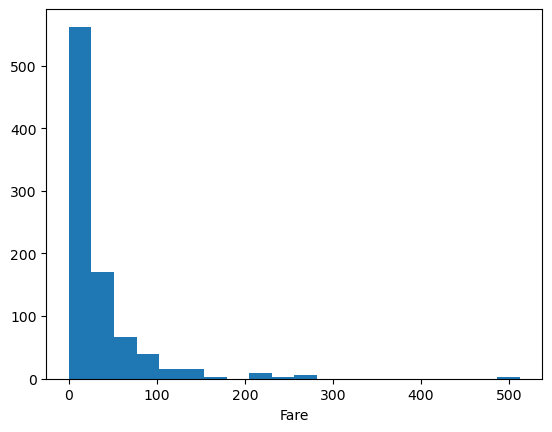

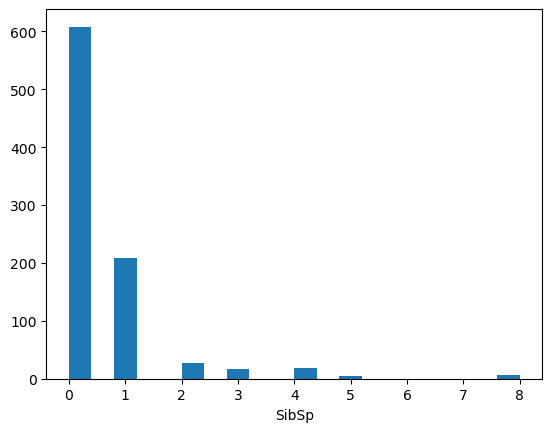

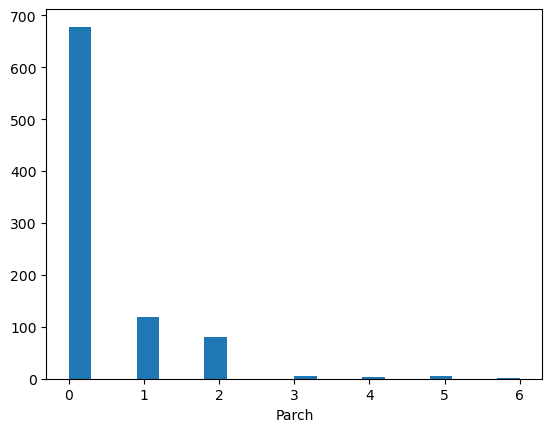

In [28]:
# EDA

# here we use a for loop to plot some histograms

for parameter in ['Pclass','Age','Fare','SibSp','Parch']:
    plt.figure()
    plt.hist(train_data[parameter],bins = 20)
    plt.xlabel(parameter)
    plt.show()

## QUESTION 1: _How many NaNs?_

An important part of analysis is determining what percentage of your dataset are NaN values (not a number, i.e. a missing value). In the cell below do the following:

**i. Print the name of each column along with its number of NaN values.**

**ii. Out of the total number of datapoints ($n_{rows} \times n_{cols}$), what percentage of these are NaNs? Calculate the total number of NaNs and divide by the total number of datapoints and multiply this result by 100 to get it in a percentage.**

In [29]:
train_data[train_data.isnull().values]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [30]:
# assess NaNs
# print each column name along with its number of NaN values here:

train_data.info()

# calculate percentage of NaNs in the dataset here:

percent_null = train_data.isnull().values.sum()/len(train_data.index)

percent_null


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


0.9719416386083053

## QUESTION 2: _Feature selection_

Here you are to select the features (i.e. columns or variables) that you would like to include in the analysis. You will also split the dataset into training and validation data (in this case the "testing" dataset is the data with unknown outcomes, just like in the housing regression from the ML3 session).

**i. Select the features by creating a list of strings of the feature names that you would like to include. In the cell below the code write a sentence about why you decided to include or not include each featuure (there are some that do not need to be included but this is up to your discretion!).**

**ii. Split the feature array and target array ($X$ and $y$ respectively) into training and validation subsets.**

In [32]:
# split for training and testing
from sklearn.model_selection import train_test_split

features = ['Pclass', 'Age', 'SibSp', 'Parch']
#removed 'Sex', 

X = train_data[features] # set the features to be the columns in the list
y = train_data['Survived'] # set the target to be Survived

# split the training data into training and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

# this is just calling the testing features X_test for symmetry with the training data. 
# there is no y_test, that is for us to calculate
X_test = test_data[features]

### Question 2 continued:

Feature justification:

**iii. After the dash write a sentence or two on why you decided to include/exclude that variable for predicting the survival outcome. Think about, does this information have an effect on surviving the Titanic sinking?**

PassengerId - NO. If we needed a key for the data, I would keep it but in this case it is unnecesssary

Pclass - YES. Tells us what deck they stayed on and would factor into their ability to get to lifeboats

Name - NO. Will not affect surivability but would be interesting for historical purposes. 

Sex - YES. Women and children where first to board lifeboats

Age - YES. Women and children where first to board lifeboats

SibSp - YES. Sibilings would likely attempt to ensure their siblings were on lifeboats.

Parch - YES. Parents will ensure their children were on lifeboats

Ticket - NO.  Irrelavant

Fare - NO. Relevant data likely covered by Pclass

Cabin - NO. Relevant data likely covered by Pclass

Embarked - NO. Time on voyage could be a survivability factor in undersea voyages but this would not affect the outcome of the boat hitting the iceberg.

## QUESTION 3: _Data preprocessing_

Here the data preprocessing is set up just like how we did in the ML3 session.

It is mostly filled out, but here is what you need to do:

**i: Research for and select a method to impute the numerical data. Here is a starting point**
https://scikit-learn.org/stable/modules/impute.html

**ii: Research for and select a method to scale the numerical data.**

In [33]:
# PREPROCESSING STEPS FOR NUMERICAL AND CATEGORICAL FEATURES

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# this gets the numeric features as a list, these will either be an integer or a float
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# similarly this gets the categorical features as a list. these are strings and not numbers, for example could be 'yes' or 'no'
categorical_features = X.select_dtypes(include=['object']).columns

# this defines how we want to transform the numerical features

# !!!PUT YOUR IMPUTER AND SCALERS FOR THE NUMERICAL DATA HERE!!!:
NUMERICAL_IMPUTER = SimpleImputer(missing_values=np.nan, strategy='mean')
NUMERICAL_SCALER = StandardScaler()

numeric_transformer = Pipeline(steps=[
    ('imputer', NUMERICAL_IMPUTER), # here we replace every missing or NaN value with the mean of the features
    ('scaler', NUMERICAL_SCALER) # here we scale every feature such that its mean is 0 and standard deviation is 1
])


# this defines how we want to transform the categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # here we replace every missing or NaN value with the most commonly occuring label
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # this converts the categorical variables
])


# this now applies the column transforms we just defined
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), # define the process as the name 'num', and tell sklearn to apply the numeric transformer we defined the the numeric features we got into the list
        ('cat', categorical_transformer, categorical_features) # same with the categorical variables
    ])

### Question 3 continued

Answer the following questions in a couple of sentences:

**iii. What is imputation and why is it useful/important in data preprocessing?**

Eliminating NaNs could possibly leave you with very little data. imputation interpolates data to fill missing values.

**iv. Explain what one-hot encoding and when you would implement it in data preprocessing.**

one-hot encoding changes catergorical data into numerical data. This would be implemented when numerical input is necessary.

**v. Explain why scaling the numerical data is important in data preprocessing.**

Scaling allows your data to fit a particular range. This is important when measing the distance between data points. 


## QUESTION 4: _Model selection_

Now for the fun part! Here you are to determine which sklearn ML model to implement for the analysis.

Some example libraries to find useful models are `sklearn.ensemble` or `sklearn.linear_model`.

This link could be a useful start for determining a model: https://scikit-learn.org/stable/tutorial/machine_learning_map/

Note that you do  not have to be limited to `sklearn` for your model! There are other Python ML libraries if you want to venture out and choose another model/algorithm.

**i. Choose and implement a machine learning model to predict survival (remember it is a _binary outcome_) for the passengers on board the Titanic.**

In [34]:
# build model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=0).fit(X,y)
model_name = 'TitanicSurvivor' # put a name for your model to input to the Pipeline function


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Question 4 continued:

**ii. Write a short paragraph justifying why you chose the model that you did.**
Since this is a predictor of a bivalent state (survived or not) Logistical Regression was the best choice.

In [ ]:
# define full model

full_model = Pipeline(steps=[('preprocessor', preprocessor),
                              (model_name, model)])

In [ ]:
# fit model to data

full_model.fit(X_train, y_train)
None # I just put this here to suppress the output of full_model.fit(X_train, y_train). if you want you can delete this line and see what happens

In [ ]:
# make predictions

y_val_pred = full_model.predict(X_val)

In the cell below the accuracy metrics are calculated by comparing what is called the "ground truth" (the known values for survival in `y_val`, to the predicted values that were obtained by applying the model to `X_val` (we call this `y_val_pred`).

Feel free to go back and select a different model, or adjust the parameters, and see how the accuracy metrics and confusion matrix change.

In [ ]:
# accuracy metrics

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay


y_true = y_val
y_pred = y_val_pred

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred) 

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion matrix:")

# this plots the confusion matrix
cmd = ConfusionMatrixDisplay(conf_matrix)
fig, ax = plt.subplots(dpi = 300)
cmd.plot(ax=ax)

In [ ]:
# here we use the model to make predictions on the test data!

y_unknown_predict = full_model.predict(X_test)

### QUESTION 5:

**i. Write a sentence or two explaining each of the following:**

Accuracy - 

Precision - 

Recall - 

Confusion matrix -

## BONUS QUESTION 6 (OPTIONAL): _Hyperparameter tuning_

**i. In the cells below tune the parameters in the model you selected and recalculate the accuracy metrics. Make a comment on the method for hyperparameter tuning (i.e. grid search, random search, etc) that you chose.**

In [ ]:
# hyperparameter tuning goes here and below